<a href="https://colab.research.google.com/github/thegreekgeek/COMP1150/blob/main/COMP1150_LN20-21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DATA AND DATABASES**



**Introduction**

Today’s technology can store vast amounts of data, but this data is only useful if we can extract relevant information efficiently. This week, we’ll explore database systems and how they use abstraction to turn large datasets into meaningful insights.

<br>

**Data Organization**

A **bit** (0 or 1) is the smallest unit of data, but it carries little meaning on its own. Bits are combined into groups of eigth called **bytes**, which can represent a character or small number and is the basic unit of memory. Multiple bytes form a **field**, such as a *name* or *ID*. A set of related fields creates a **record**, like details about a student. Records are grouped into **files**, and related files together form a **database**.


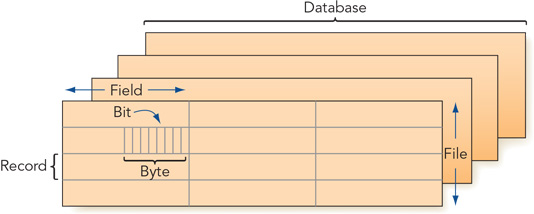

The figure above illustrates the data organization hierarchy. The entire rectangle represents a database, which is divided into three vertical sections called fields. It is also split into four horizontal rows, each representing a record. Each record is made up of bytes, with each byte consisting of 8 bits.


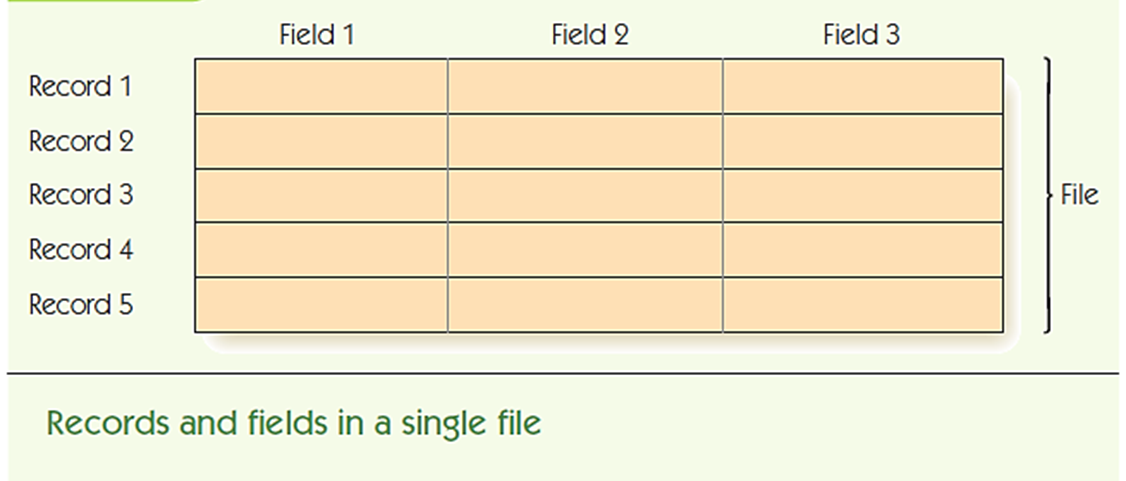

<br>

**Database Fundamentals**

A **database** is an organized collection of related information stored and accessed electronically. We may also define a **database** as a collection of related data files.

Database allows information to be accessed through various attributes or relationships between entries. In contrast, a flat file (or traditional file system) is one-dimensional, offering a single, fixed view of the data. For example, while a flat file might list compositions by composer, a database can show all works by a composer, all composers of a specific genre, or those who wrote variations on another composer’s pieces.


**Designing Your Database: The Entity-Relationship (ER) Model**

Before storing any information, we need a clear plan—just like an architect needs blueprints before constructing a building. In database design, the **Entity-Relationship (ER)** model serves as this blueprint. It helps us determine what data to store and how different pieces of data are connected.

The ER model is a way to visually represent how data is structured and connected in a database. The ER model is based on the notion of real-world entities and relationship among them. It helps design the **schema** before build a database.

A **schema** is a description of the entire database structure that is used by the database software to maintain the database.

<br>

**Understanding Entities and Relationships**

An **entity** is a distinct object or concept about which we want to store information. Examples of entities include Student, Book, Patient, City, Building, e.t.c. Each entity has  **attributes**.

**Attributes** are properties or details of entities e.g, name, age, gender, ID. For example, a RCTC student entity has attributes such as *name*, *starId*, *gender*,*techId*.

A **Relationship** is an association between or among thing or entites. A relationship describes a meaningful interaction that needs to be remembered by the system. For example, a student *borrows* a book. Another example is a RCTC student *lives* in Rochester.

Relationships have two important characteristics:

1. **Cardinality**: How many entities can participate in each side of the relationship:

>* **One-to-One (1:1)**: Each entity relates to exactly one other entity. For example, each student may have a unique student ID.

>* **One-to-Many (1:N)**: One entity can relate to multiple other entities, but those entities each relate to only one entity. For example, a professor can teach multiple students, but each student is taught by only one professor in a particular course.

>* **Many-to-Many (M:N)**: Entities on both sides can relate to multiple entities on the other side. For example, a student can enroll in multiple courses, and each course can have multiple students.

2. **Optionality**: Whether the relationship is required:

>* ***Mandatory**: The relationship must exist. For example, every student must be enrolled in at least one course.

>* **Optional**: The relationship may exist. For example, a student may or may not participate in extracurricular activities.

<br>

**Crow's Foot Notation**

In database diagrams, we show cardinality and optionality using "crow's foot notation":
```
One         Only one     ──┤
Many        Zero or more ──<
Optional    Zero or one  ──O
Mandatory   One or more  ─║<
```









**A Simple ER Diagram**

Here's a basic ER diagram  modelling a student:

In [ ]:
# @title
import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

mm("""
erDiagram
STUDENT }|--o{ COURSE : "enrolls in"
STUDENT }o--|| INSTRUCTOR : "taught by"

STUDENT {
    name string
    age int
    gender string
}

COURSE {
    name string
    level int
    description string
}

INSTRUCTOR {
    instructor_id int
    name string
    department TEXT

}
""")

**The Many-to-Many Challenge**


The many-to-many relationship between STUDENT and COURSE can't be directly represented in a relational database. To manage this, we use an intermediary ENROLLMENT table that links students to courses and stores relationship-specific details like enrollment date and grade.

Next, we'll explore how to convert this conceptual model into real database tables, including the use of the ENROLLMENT table to handle the many-to-many relationship.

**Understanding the Relational Model: Organizing Data in Tables**

Now that we have our ER model as a blueprint, the next step is understanding how databases store this information. Most modern databases use the relational model, which organizes data into tables (or relations). You can think of each table like a spreadsheet, but with strict rules for how data is stored and connected.


**The Building Blocks of Tables**

Let’s break down the key parts of a table using the STUDENT table as an example:

| student_id | name | age | gender |
|------------|------|-----|-------------|
| 1          | James | 19  | Male    | 14500        
| 2          | Susan | 19  | Female    | 13900            
| 3          | John  | 20  | Male       | 15000          


<br>

A table is made up of:


**Columns (Attributes)**: These define the type of data stored. Each has a name and a data type (e.g., student_id is numeric, name is text).

**Rows (Tuples)**: Each row represents a single record.

<br>

**Keys**

In database, a **key** is an attribute(or set of attributes) used to uniquely identify rows (records) in a table. Key helps enforce integrity, speed up data retrieval and define relationships between tables.

* **Primary Key**: This uniquely identifies each row. In our table, student_id serves as the primary key, ensuring no two students share the same ID.

* **Foreign Key:** This refers to an attribute in a relational database table that is a primary key in another table, used to establish a relationship between the tables.


**Connecting Tables with Foreign Keys**

Tables don’t exist in isolation—they often relate to one another. Foreign keys are how we represent these relationships in a database. A foreign key is a column that refers to the primary key of another table.

Take the ENROLLMENT table:

| enrollment_id | student_id | course_id | start_date | grade |
|--------------|------------|-----------|------------|-------|
| 1            | 1          | 101       | 2025-10-15 | 95.0  |
| 2            | 1          | 102       | 2025-10-15 | 89.5  |
| 3            | 2          | 101       | 2025-10-15 | 92.0  |


* `student_id` is a foreign key referencing the `STUDENT` table.

* `course_id` is a foreign key referencing the `COURSE` table.



These keys allow us to:

* Ensure data integrity (you can’t enroll a non-existent student)

* Combine data across tables (e.g., match students with their grades)

* Avoid redundancy by organizing related data efficiently


**Rules and Constraints**


The relational model enforces important rules to ensure data quality:

1. Entity Integrity: Primary keys must be unique and not null, so each record is uniquely identifiable.

2. Referential Integrity: Foreign keys must match a primary key in another table or be null—this prevents "orphan" records (e.g., enrollments for students that don’t exist).

3. Domain Integrity: Values must follow the correct data type and any additional rules. For example, an age column defined as a positive integer can't contain negative numbers or text.



**Database Management System (DBMS)**

A database management system (DBMS) is a software that manages the files in a databse. DBMS  acts as an intermediary between users (or applications) and a database. It provides tools and functionality to create, manage, and interact with the database efficiently. Essentially, it’s the "control center" that lets you store, retrieve, update, and organize data without needing to deal with the nitty-gritty details of how the data is physically stored on a computer.

Examples of DBMS
* Relational DBMS (RDBMS):

>* MySQL: Open-source, widely used for web apps.

>* PostgreSQL: Advanced, open-source, great for complex queries.

>* Oracle Database: Enterprise-grade, feature-rich.

>* Microsoft SQL Server: Popular in Windows environments.

* NoSQL DBMS:

>* MongoDB: Document-based, great for flexible data.

>* Redis: Key-value store, super fast for caching.

>* Cassandra: Column-family, built for scalability.

* Others:
>* SQLite: Lightweight, embedded in apps (e.g., mobile devices).




**Important Features of a DBMS**
1. Data Storage: Manages how data is stored, whether in tables (relational DBMS) or other structures (e.g., documents in NoSQL).

2. Data Retrieval: Allows users to query the database (e.g., using SQL) to fetch specific data.

3. Data Manipulation: Supports adding, updating, or deleting data.

4. Data Security: Controls access with user authentication and permissions.

5. Data Integrity: Ensures data is accurate and consistent (e.g., through constraints like primary keys).

6. Concurrency Control: Manages multiple users accessing the database at once without conflicts.

7. Backup and Recovery: Protects data from loss by providing backup and restore options.




**Common Data Types (in SQLite)**

`INTEGER` – Whole numbers (student_id, age)

`TEXT` – Strings (name, home_planet)

`REAL` – Decimal numbers (grade, midichlorian_count)

`DATE` – Calendar dates (start_date)

`NULL` – Represents missing or unknown values


<br>

**Benefits of the Relational Model**

* Data Independence – Storage changes don’t affect how applications access data

* Data Integrity – Constraints ensure accuracy and reliability

* Flexible Queries – Easily combine and analyze data across tables

* Concurrent Access – Multiple users can work with the data at once

* Data Consistency – Centralized storage reduces redundancy

Up next: We’ll dive into SQL, the language used to create, manage, and query relational databases—bringing these concepts to life.

**SQL (Structured Query Language)**

SQL is the standard language used to communicate with relational databases. It allows users to create, read, update, and delete (CRUD) data, as well as define and manage database structures. You may think of it as the language you use to communicate with your database.


Every SQL command has a specific purpose, and we can group these commands into several categories:

* Commands for defining data structures (CREATE, ALTER, DROP)
* Commands for manipulating data (INSERT, UPDATE, DELETE)
* Commands for retrieving data (SELECT)

In [ ]:
!pip install jupysql -q
%reload_ext sql
%sql sqlite:///comp1150_database.db
%config SqlMagic.autopandas=True
%sql PRAGMA foreign_keys=ON;


Running query in 'sqlite:///comp1150_database.db'

""


In [ ]:
%%sql
DROP TABLE IF EXISTS enrollment;
DROP TABLE IF EXISTS courses;
DROP TABLE IF EXISTS instructors;
DROP TABLE IF EXISTS student;

Running query in 'sqlite:///comp1150_database.db'

""


In [ ]:
%%sql
DROP TABLE IF EXISTS student;
CREATE TABLE student (
    student_id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    age INTEGER,
    gender TEXT
);

Running query in 'sqlite:///comp1150_database.db'

""


Let's break down each part of this statement:

1. `CREATE TABLE student` - This tells SQLite we want to create a new table named "student"

2. Inside the parentheses, we list each column with its data type:
   - `student_id INTEGER PRIMARY KEY` - Creates a unique identifier for each student
   - `name TEXT NOT NULL` - Stores the student's name, and it can't be empty
   - `age INTEGER` - Stores the student's age as a whole number
   - `gender TEXT` - Stores the gender of the student
   
3. The **PRIMARY KEY** constraint on student_id ensures that:
   - Each student has a unique identifier
   - The value cannot be NULL
   - SQLite will automatically generate increasing values for this column

4. The **NOT NULL** constraint on name ensures that every student must have a name

In SQLite, we have several basic data types to choose from:
- **INTEGER**: Whole numbers
- **TEXT**: Any text or string data
- **REAL**: Decimal numbers
- **DATE**: Calendar dates (stored as TEXT in SQLite)
- **BLOB**: Binary data (like images or files)


<br>

Let's create the remaining tables from our ER diagram: INSTRUCTOR, COURSE, and ENROLLMENT. We've already created STUDENT. Now we'll define the others and see how they relate.


1. INSTRUCTOR table

In [ ]:
%%sql
DROP TABLE IF EXISTS instructor;
CREATE TABLE instructor (
    instructor_id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    department TEXT NOT NULL

);

Running query in 'sqlite:///comp1150_database.db'

""


This table stores information about the instructor that teaches the student.

* `instructor_id` uniquely identifies the instructor for the course.
* `name` holds the name of the instructor.
* `department` holds the department of the instructor.


2. COURSE table

In [ ]:
%%sql
DROP TABLE IF EXISTS course;
CREATE TABLE course (
    course_id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    level TEXT NOT NULL,
    description TEXT,
    instructor_id INTEGER,
    FOREIGN KEY (instructor_id) REFERENCES instructor (instructor_id)
);

Running query in 'sqlite:///comp1150_database.db'

""


Notice the use of a FOREIGN KEY constraint—it links each course to a valid instructor. This ensures:

* Every instructor_id in the course table must exist in the INSTRUCTOR table.

* A course can’t be assigned to a non-existent instructor.

*  SQLite blocks deleting an instructor who is still assigned to courses, preserving data integrity.


<br>


The ENROLLMENT Table

Finally, let's create the enrollment table that tracks which students are taking which courses:

In [ ]:
%%sql
DROP TABLE IF EXISTS enrollment;
CREATE TABLE enrollment (
    enrollment_id INTEGER PRIMARY KEY,
    student_id INTEGER NOT NULL,
    course_id INTEGER NOT NULL,
    start_date TEXT NOT NULL,
    grade REAL,
    FOREIGN KEY (student_id) REFERENCES student (student_id),
    FOREIGN KEY (course_id) REFERENCES course (course_id)
);

Running query in 'sqlite:///comp1150_database.db'

""


This table is important because it:

* Establishes a many-to-many relationship between students and courses.

* Contains two foreign keys, linking to both the student and course tables.

* Stores additional enrollment details (like start date and grade).

* Uses the REAL data type for grade, allowing decimal values (e.g., 90.2).

<br>

We can verify the structure of our table using a special SLite command:

In [ ]:
%%sql
-- Get table schemas
SELECT *
FROM sqlite_master
WHERE type='table';

Running query in 'sqlite:///comp1150_database.db'

,type,name,tbl_name,rootpage,sql
0,table,student,student,2,CREATE TABLE student (\n student_id INTEGER...
1,table,instructor,instructor,3,CREATE TABLE instructor (\n instructor_id I...
2,table,course,course,5,CREATE TABLE course (\n course_id INTEGER P...
3,table,enrollment,enrollment,4,CREATE TABLE enrollment (\n enrollment_id I...


**Adding data to our database**

Now that our tables are set up, let’s learn how to add data. In SQL, we use the INSERT statement to add new records. When working with related tables, it's important to insert data in the right order to preserve the relationships.

Basic INSERT Syntax:
The INSERT statement has two main parts:

* Specify the columns you're inserting data into.

* Provide the values corresponding to those columns.

<br>

**Inserting one instructor in the Instructor table**
```sql
INSERT INTO instructor (instructor_id, name, department)
VALUES (1, 'Olukorede', 'Computer Science');
```

<br>

**Inserting multiple instructors at a time**
```sql
INSERT INTO instructor (instructor_id, name, department)
VALUES
    (2, 'James', 'Philosophy'),
    (3, 'Susie', 'Political Science'),
    (4, 'Don', 'Cybersecurity');

```

We insert into the instrcutor table below:

In [ ]:
%%sql
INSERT INTO instructor (instructor_id, name, department)
VALUES
    (5, 'Olukorede', 'Computer Science'),
    (6, 'James', 'Philosophy'),
    (7, 'Susie', 'Political Science'),
    (8, 'Don', 'Cybersecurity'),
    (9, 'Francis', 'Mathematics'),
    (10, 'Ruth', 'Mathematics'),
    (11, 'Cindy', 'Gender Studies');


Running query in 'sqlite:///comp1150_database.db'

7 rows affected.

""


INSERT INTO COURSE TABLE

In [ ]:
%%sql

INSERT INTO course (course_id, name, level, description, instructor_id)
VALUES
    (11, 'Introduction to Computer Science', 'Freshman', 'Basic computer science concepts and programming', 5),
    (12, 'Advanced Algorithms', 'Senior', 'In-depth study of algorithms and data structures', 6),
    (13, 'Philosophy of Technology', 'Sophomore', 'Exploration of philosophical issues in technology', 7),
    (14, 'Cybersecurity Essentials', 'Junior', 'Foundational concepts in cybersecurity', 8),
    (15, 'Introduction to Algebra', 'Junior', 'Basic concepts in Algebra', 9),
    (16, 'Philosophy of Gender Equality', 'Senior',"Advanced Gender Studies", 11);


Running query in 'sqlite:///comp1150_database.db'

6 rows affected.

""


In [ ]:
%%sql

INSERT INTO student (student_id, name, age, gender)
VALUES
    (1, 'Luke Skywalker', 21, 'Male'),
    (2, 'Leia Organa', 22, 'Female'),
    (3, 'Han Solo', 30, 'Male'),
    (4, 'Rey Skywalker', 19, 'Female'),
    (5, 'James Bond', 18, 'Male'),
    (6, 'Usha James', 18, 'Female'),
    (7, 'Aisha Jubril', 17, 'Female');



Running query in 'sqlite:///comp1150_database.db'

7 rows affected.

""


In [ ]:
%%sql
SELECT * FROM student;

-- Check existing courses



Running query in 'sqlite:///comp1150_database.db'

,student_id,name,age,gender
0,1,Luke Skywalker,21,Male
1,2,Leia Organa,22,Female
2,3,Han Solo,30,Male
3,4,Rey Skywalker,19,Female
4,5,James Bond,18,Male
5,6,Usha James,18,Female
6,7,Aisha Jubril,17,Female


In [ ]:
%%sql

SELECT * FROM course;

Running query in 'sqlite:///comp1150_database.db'

course_id,name,level,description,instructor_id
11,Introduction to Computer Science,Freshman,Basic computer science concepts and programming,5
12,Advanced Algorithms,Senior,In-depth study of algorithms and data structures,6
13,Philosophy of Technology,Sophomore,Exploration of philosophical issues in technology,7
14,Cybersecurity Essentials,Junior,Foundational concepts in cybersecurity,8
15,Introduction to Algebra,Junior,Basic concepts in Algebra,9
16,Philosophy of Gender Equality,Senior,Advanced Gender Studies,11


In [ ]:
%%sql

INSERT INTO enrollment (student_id, course_id, start_date, grade)
VALUES
    (1, 11, '2024-09-01', 85.0),
    (2, 12, '2024-09-01', 90.0),
    (3, 13, '2024-09-01', 93.5),
    (4, 14, '2024-09-01', 87.5),
    (5, 15, '2024-09-01', 97.0),
    (6, 16, '2024-09-01', 87.5);


Running query in 'sqlite:///comp1150_database.db'

6 rows affected.

""


In [ ]:
%%sql
-- Get table schemas
SELECT *
FROM student;

Running query in 'sqlite:///comp1150_database.db'

,student_id,name,age,gender
0,1,Luke Skywalker,21,Male
1,2,Leia Organa,22,Female
2,3,Han Solo,30,Male
3,4,Rey Skywalker,19,Female
4,5,James Bond,18,Male
5,6,Usha James,18,Female
6,7,Aisha Jubril,17,Female


**Retrieving Data: Basic `SELECT` Queries**

Now that our database has data, we can begin retrieving and analyzing it using SQL. The `SELECT` statement is the primary tool for querying information from your tables. Let’s start with the basics and gradually explore more advanced queries.

The Basic `SELECT` Statement
At its simplest, a `SELECT` statement has two key parts:

* `SELECT`: specifies the columns you want to retrieve

* `FROM`: specifies the table you’re retrieving the data from


<br>

We use the `SELECT` statement to retrieve names and the age of student below:

In [ ]:
%%sql

SELECT name, age
FROM STUDENT

Running query in 'sqlite:///comp1150_database.db'

,name,age
0,Luke Skywalker,21
1,Leia Organa,22
2,Han Solo,30
3,Rey Skywalker,19
4,James Bond,18
5,Usha James,18
6,Aisha Jubril,17


Using the `SELECT` statement to select only the name and gender of students

In [ ]:
%%sql

SELECT name, gender
FROM STUDENT

Running query in 'sqlite:///comp1150_database.db'

,name,gender
0,Luke Skywalker,Male
1,Leia Organa,Female
2,Han Solo,Male
3,Rey Skywalker,Female
4,James Bond,Male
5,Usha James,Female
6,Aisha Jubril,Female


To select all the columns at one, use asterisk (*):

In [ ]:
%%sql

SELECT *
FROM STUDENT

Running query in 'sqlite:///comp1150_database.db'

,student_id,name,age,gender
0,1,Luke Skywalker,21,Male
1,2,Leia Organa,22,Female
2,3,Han Solo,30,Male
3,4,Rey Skywalker,19,Female
4,5,James Bond,18,Male
5,6,Usha James,18,Female
6,7,Aisha Jubril,17,Female


The above table shows all the columns in the student table.

**Filtering Records**

The records in tables are filtered using the `WHERE` clause. The `WHERE` clause must be used in combination with necessary conditions.


For example:

```sql
SELECT column1, column2
FROM table_name
WHERE condition;
```

In [ ]:
%%sql
SELECT name, age, gender
FROM student
WHERE age > 21

Running query in 'sqlite:///comp1150_database.db'

,name,age,gender
0,Leia Organa,22,Female
1,Han Solo,30,Male


The above table displays the names, age and gender of students who are older than  21.

<br>

You can use various comparison operators:

>* Equal to: `=`
>*  Not equal to: `!=` or `<>`
>*  Greater than: `>`
>*  Less than: `<`
>*  Greater than or equal to: `>=`
>* Less than or equal to: `<=`
>* Match one in a list: `IN`

More examples are provided below:

In [ ]:
%%sql
-- Show the record of Han Solo
SELECT *
FROM student
WHERE name = 'Han Solo'

Running query in 'sqlite:///comp1150_database.db'

,student_id,name,age,gender
0,3,Han Solo,30,Male


**LIMIT CLAUSE**

The LIMIT clause in SQL is used to restrict the number of rows returned by a query. This is useful when your table has lots of data and you only need a preview or sample.


In [ ]:
%%sql

SELECT *
FROM course
LIMIT 3; -- This shows the first three records.

Running query in 'sqlite:///comp1150_database.db'

,course_id,name,level,description,instructor_id
0,11,Introduction to Computer Science,Freshman,Basic computer science concepts and programming,5
1,12,Advanced Algorithms,Senior,In-depth study of algorithms and data structures,6
2,13,Philosophy of Technology,Sophomore,Exploration of philosophical issues in technology,7


**ORDERBY CLAUSE**

The `ORDER BY` clause in SQL is used to sort the result set of a query by one or more columns, either in ascending (`ASC`) or descending (`DESC`) order.

The basic syntax is provided below:

```sql
SELECT column1, column2
FROM table_name
ORDER BY column1 [ASC | DESC];
```

In [ ]:
%%sql

SELECT name, age, gender
FROM student
ORDER BY age DESC

Running query in 'sqlite:///comp1150_database.db'

,name,age,gender
0,Han Solo,30,Male
1,Leia Organa,22,Female
2,Luke Skywalker,21,Male
3,Rey Skywalker,19,Female
4,James Bond,18,Male
5,Usha James,18,Female
6,Aisha Jubril,17,Female


The above table displays students based on their ages.

<br>


You can sort by multiple columns:

In [ ]:
%%sql
SELECT name, age, gender
FROM student
ORDER BY age DESC, name ASC;

Running query in 'sqlite:///comp1150_database.db'

,name,age,gender
0,Han Solo,30,Male
1,Leia Organa,22,Female
2,Luke Skywalker,21,Male
3,Rey Skywalker,19,Female
4,James Bond,18,Male
5,Usha James,18,Female
6,Aisha Jubril,17,Female


**PRACTICE QUESTIONS**

1. Write a SQL query displaying the course_id, name of course and the instructor id from the course table.

2. Write a SQL query for displaying the student rows in ascending order of their age and name.

3.Write a SQL query to display student that score more than 90 in the enrollment table.

**Advanced Filtering: Combining Conditions**


Sometimes we need to filter our data using multiple conditions. SQL provides logical operators (AND, OR, NOT) and pattern matching to help us create more sophisticated queries.

Using AND, OR, and NOT
The AND operator requires both conditions to be true:

In [ ]:
%%sql
SELECT name, age, gender
FROM student
WHERE age >= 18 AND gender = 'Female';

Running query in 'sqlite:///comp1150_database.db'

,name,age,gender
0,Leia Organa,22,Female
1,Rey Skywalker,19,Female
2,Usha James,18,Female


The `OR` operator requires at least one condition to be true:

In [ ]:
%%sql
SELECT name, age, gender
FROM student
WHERE age > 18 OR gender = 'Female';

Running query in 'sqlite:///comp1150_database.db'

,name,age,gender
0,Luke Skywalker,21,Male
1,Leia Organa,22,Female
2,Han Solo,30,Male
3,Rey Skywalker,19,Female
4,Usha James,18,Female
5,Aisha Jubril,17,Female


The above table shows students who are either older than 18 or are female.

The `NOT` operator negates a condition:

In [ ]:
%%sql
SELECT name, age, gender
FROM student
WHERE NOT gender = 'Female';

Running query in 'sqlite:///comp1150_database.db'

,name,age,gender
0,Luke Skywalker,21,Male
1,Han Solo,30,Male
2,James Bond,18,Male


**Pattern Matching with `LIKE`**

The `LIKE`operator lets you search for patterns in text. It uses two special characters:

* `%` matches any sequence of characters
* `_` matches any single character
Find all students whose names start with 'L':

In [ ]:
%%sql
SELECT name, gender
FROM student
WHERE name LIKE 'L%';

Running query in 'sqlite:///comp1150_database.db'

,name,gender
0,Luke Skywalker,Male
1,Leia Organa,Female


Find all instructors with five-letter names:

In [ ]:
%%sql
SELECT name, department
FROM instructor
WHERE name LIKE '_____';

Running query in 'sqlite:///comp1150_database.db'

,name,department
0,James,Philosophy
1,Susie,Political Science
2,Cindy,Gender Studies


The above table lists the names of instructors with five-letter names.

<br>

**Using `BETWEEN` for range queries**

The `BETWEEN` operator provides an easy way to check if a value falls within a range.

In [ ]:
%%sql
SELECT student_id, name
FROM student
WHERE student_id BETWEEN 4 AND 8;

Running query in 'sqlite:///comp1150_database.db'

,student_id,name
0,4,Rey Skywalker
1,5,James Bond
2,6,Usha James
3,7,Aisha Jubril


The table above lists the names and ids of students with ids between 4 and 8.

<br>


**Column Aliases with `AS`**


Sometimes column names are unclear or we perform calculations that need better labels. The AS keyword lets us rename columns in our results:

In [ ]:
%%sql
SELECT
    student_id AS starId,
    name AS student_name


FROM student;

Running query in 'sqlite:///comp1150_database.db'

,starId,student_name
0,1,Luke Skywalker
1,2,Leia Organa
2,3,Han Solo
3,4,Rey Skywalker
4,5,James Bond
5,6,Usha James
6,7,Aisha Jubril


**Aggregate Functions**

Aggregate functions are used to perform calculations on multiple rows of a table's column and return a single value. The basic aggregate functions are:
* `COUNT()`: Counts rows
* `SUM()`: Adds up values
* `AVG()`: Calculates the average
* `MAX()`: Returns the highest value
* `MIN()`: Returns the lowest value


Let's see some examples below:

In [ ]:
%%sql
--Returns the total number of students in the student table
SELECT COUNT(*) AS total_students
FROM student

Running query in 'sqlite:///comp1150_database.db'

,total_students
0,7


In [ ]:
%%sql

SELECT MAX(age) AS  max_age,
       MIN(age) AS min_age,
       AVG(age) AS average_age
FROM student


Running query in 'sqlite:///comp1150_database.db'

,max_age,min_age,average_age
0,30,17,20.714286


**Combining Data using `JOINs`**

Joins allow you to combine rows from two or more tables based on a related column (usually a foreign key) relationship. This is useful when you want to query across multiple tables.

**When we need JOINs**

Imagine you want to find out which instructor is teaching each course. Here's the setup:

* The instructor's name is stored in the instructor table.

* Course details are stored in the course table.

* The course table has a column called instructor_id that links each course to its instructor.

Since this information is spread across two tables, we use a JOIN to bring them together. This allows us to see both the course name and the instructor's name in a single result.




In [ ]:
%%sql

--INNER JOIN

SELECT course.name AS course_name, instructor.name AS instructor_name
FROM course
INNER JOIN instructor ON course.instructor_id = instructor.instructor_id


Running query in 'sqlite:///comp1150_database.db'

,course_name,instructor_name
0,Introduction to Computer Science,Olukorede
1,Advanced Algorithms,James
2,Philosophy of Technology,Susie
3,Cybersecurity Essentials,Don
4,Introduction to Algebra,Francis
5,Philosophy of Gender Equality,Cindy


**Multiple JOINs**

We can join more than two tables. Let's see complete information about enrollments:

In [ ]:
%%sql

--MULTIPLE JOINS
SELECT
    student.name AS student_name,
    course.name AS course_name,
    instructor.name AS instructor_name,
    enrollment.grade
FROM enrollment
JOIN student ON enrollment.student_id = student.student_id
JOIN course ON enrollment.course_id = course.course_id
JOIN instructor ON course.instructor_id = instructor.instructor_id
LIMIT 4;



Running query in 'sqlite:///comp1150_database.db'

,student_name,course_name,instructor_name,grade
0,Luke Skywalker,Introduction to Computer Science,Olukorede,85.0
1,Leia Organa,Advanced Algorithms,James,90.0
2,Han Solo,Philosophy of Technology,Susie,93.5
3,Rey Skywalker,Cybersecurity Essentials,Don,87.5


**`GROUP BY` clause**

The GROUP BY clause  is used to group rows that have the same values in specified columns into summary rows. It’s often used with aggregate functions like COUNT(), SUM(), AVG(), MAX(), or MIN().

The query below the average grade per course.

In [ ]:
%%sql
SELECT
    course.name AS course_name,
    AVG(enrollment.grade) AS average_grade
FROM enrollment
JOIN course ON enrollment.course_id = course.course_id
GROUP BY course.name;


Running query in 'sqlite:///comp1150_database.db'

,course_name,average_grade
0,Advanced Algorithms,90.0
1,Cybersecurity Essentials,87.5
2,Introduction to Algebra,97.0
3,Introduction to Computer Science,85.0
4,Philosophy of Gender Equality,87.5
5,Philosophy of Technology,93.5


**Table showing basic SQL commands**

The table below shows  basic SQL commands that you may find useful.


| Category | SQL Command | Description |
| --- | --- | --- |
| SELECT | `SELECT c1, c2 FROM t` | Retrieves data from columns `c1` and `c2` in table `t` |
|  | `SELECT * FROM t` | Retrieves all columns from table `t` |
|  | `SELECT DISTINCT c1 FROM t` | Retrieves unique values from column `c1` in table `t` |
|  | `SELECT c1, aggregate_function(c2) FROM t` | Retrieves values from `c1` and applies an aggregate function (e.g., `SUM`, `AVG`, `COUNT`) to `c2` |
| WHERE | `SELECT * FROM t WHERE condition` | Retrieves rows from table `t` that satisfy the given `condition` |
|  | `SELECT * FROM t WHERE c1 LIKE pattern` | Retrieves rows from table `t` where values in column `c1` match the specified `pattern` (e.g., `'A%'` for values starting with 'A') |
|  | `SELECT * FROM t WHERE c1 IN (v1, v2, ...)` | Retrieves rows from table `t` where values in column `c1` are in the specified list of values |
|  | `SELECT * FROM t WHERE c1 BETWEEN v1 AND v2` | Retrieves rows from table `t` where values in column `c1` are within the specified range |
| ORDER BY | `SELECT * FROM t ORDER BY c1` | Retrieves all rows from table `t` and sorts them based on values in column `c1` in ascending order |
|  | `SELECT * FROM t ORDER BY c1 DESC` | Retrieves all rows from table `t` and sorts them based on values in column `c1` in descending order |
| LIMIT | `SELECT * FROM t LIMIT n` | Retrieves the first `n` rows from the result set of the `SELECT` statement |
|  | `SELECT * FROM t LIMIT n OFFSET m` | Skips the first `m` rows and retrieves the next `n` rows from the result set |
| GROUP BY | `SELECT c1, aggregate_function(c2) FROM t GROUP BY c1` | Groups rows based on values in column `c1` and applies the aggregate function to `c2` for each group |
| HAVING | `SELECT c1, aggregate_function(c2) FROM t GROUP BY c1 HAVING condition` | Retrieves grouped rows that satisfy the given `condition` based on the result of the aggregate function |
| JOIN | `SELECT * FROM t1 JOIN t2 ON t1.c1 = t2.c1` | Combines rows from tables `t1` and `t2` based on the matching values in column `c1` (inner join) |
|  | `SELECT * FROM t1 LEFT JOIN t2 ON t1.c1 = t2.c1` | Returns all rows from `t1` and the matching rows from `t2`, or `NULL` if no match is found (left join) |
| UNION | `SELECT c1 FROM t1 UNION SELECT c1 FROM t2` | Combines the result sets of two or more `SELECT` statements and removes duplicates |
|  | `SELECT c1 FROM t1 UNION ALL SELECT c1 FROM t2` | Combines the result sets of two or more `SELECT` statements without removing duplicates |
| Subquery | `SELECT * FROM t1 WHERE c1 IN (SELECT c1 FROM t2)` | Retrieves rows from `t1` where values in column `c1` exist in the result of the subquery |
|  | `SELECT * FROM t1 WHERE EXISTS (SELECT * FROM t2 WHERE t1.c1 = t2.c1)` | Retrieves rows from `t1` where the subquery returns at least one row |
| CASE | `SELECT c1, CASE WHEN condition THEN 'Value1' ELSE 'Value2' END FROM t` | Returns 'Value1' if the `condition` is true, otherwise 'Value2' for each row in the result set |
| CREATE TABLE | `CREATE TABLE t (c1 datatype, c2 datatype)` | Creates a new table named `t` with columns `c1` and `c2` of specified datatypes |
| DROP TABLE | `DROP TABLE t` | Deletes the table `t` from the database |


**Document Databases and JSON Data**

Document databases are a type of NoSQL database that store data as semi-structured documents, usually in formats like JSON, BSON, or XML.

Unlike relational databases, which organize data in tables with predefined schemas, document databases take a more flexible approach. They store data in self-contained documents, typically using JSON (JavaScript Object Notation), which allows for dynamic and hierarchical data structures.

While relational databases like SQLite are traditionally table-based, they also now support JSON data types. This enables us to leverage the advantages of both worlds: the structured nature of relational databases and the flexibility of document databases. With this, we can store and manipulate JSON documents directly within our tables, making SQLite an ideal choice for applications that need a combination of both structured and semi-structured data.

**JSON**


JSON is a lightweight data format that's both human-readable and machine-friendly. It supports:

* Strings: "James"
* Numbers: 19
* Objects: {"name": "Luke", "age": 19}
* Arrays: [1, 2, 3]
* Boolean: true or false
* Null: null

Here is how a student information might look in JSON

```python
{
  "student": {
    "name": "Luke Skywalker",
    "age": 21,
    "gender": "Male",
    "instructor": {
      "name": "Olukorede",
      "department": "Computer Science"
    },
    "enrollments": [
      {
        "course": "Intro to Computer Science",
        "grade": 90,
        "completed": true
      },
      {
        "course": "Data Structures",
        "grade": 85,
        "completed": false
      }
    ]
  }
}

```

**Using JSON in SQLite**

In [ ]:
%%sql

--Create a Table with JSON column
CREATE TABLE student_profiles (
    student_id INTEGER PRIMARY KEY,
    profile JSON
);


--Insert a student profile as JSON
INSERT INTO student_profiles (profile) VALUES (
    json_object(
        'name', 'Luke Skywalker',
        'age', 21,
        'gender', 'Male',
        'instructor', json_object(
            'name', 'Professor X',
            'department', 'Computer Science'
        ),
        'enrollments', json_array(
            json_object('course', 'Intro to Programming', 'grade', 90, 'completed', true),
            json_object('course', 'Data Structures', 'grade', 85, 'completed', false)
        )
    )
);


Running query in 'sqlite:///comp1150_database.db'

1 rows affected.

""


**Querying the JSON column**

1. We can query the JSON table the usual way as follows:

In [ ]:
%%sql

SELECT * FROM student_profiles;


Running query in 'sqlite:///comp1150_database.db'

,student_id,profile
0,1,"{""name"":""Luke Skywalker"",""age"":21,""gender"":""Ma..."


2. We may write query to obtain specific data from the JSON column as follows:

In [ ]:
%%sql
SELECT json_extract(profile, '$.name') AS student_name FROM student_profiles;


Running query in 'sqlite:///comp1150_database.db'

,student_name
0,Luke Skywalker


**When to Use JSON?**

JSON in databases is particularly useful for:

1. Flexible Data Structures

```python
{
    "course_id": 101,
    "course_name": "Introduction to Computer Science",
    "level": "Freshman",
    "description": "Basic concepts of computer science",
    "instructor": {
        "instructor_name": "Professor Olukorede",
        "department": "Computer Science"
    }
}

```

2. Nested Information

```python

{
    "student_id": 1,
    "name": "Leia Organa",
    "enrollments": [
        {
            "course_id": 101,
            "course_name": "Intro to Programming",
            "instructor": {
                "name": "Professor Olukorede",
                "department": "Computer Science"
            },
            "grade": 95,
            "status": "Completed"
        },
        {
            "course_id": 102,
            "course_name": "Data Structures",
            "instructor": {
                "name": "Professor James",
                "department": "Computer Science"
            },
            "grade": null,
            "status": "In Progress"
        }
    ]
}

```

3. Array Data

```python
{
    "name": "Luke Skywalker",
    "age": 21,
    "courses": ["Introduction to CS", "Advanced Algorithms"]
}
```


**When to Use Which?**


**Use Relational Tables when:**

Data structure is consistent and well-defined
You need complex queries across relationships
Data integrity is crucial
Multiple applications need to access the data


**Use JSON when:**

Data structure varies between records
You need to store nested or hierarchical data
Schema flexibility is important
You're storing document-like data (user profiles, game states, configurations)
Many modern applications use both approaches together, getting the best of both worlds!

Writing Python code to query a database

In [ ]:
import sqlite3  #Built-in module in python

# Connect to the SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('comp1150_database.db')  # This helps us to connect to the database

# Create a cursor object to interact with the database
cursor = conn.cursor()

# Create a simple table (if it doesn't already exist)
cursor.execute('''
CREATE TABLE IF NOT EXISTS student (
    student_id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    age INTEGER NOT NULL,
    gender TEXT NOT NULL
);
''')

# Insert some sample data
cursor.execute('''
INSERT INTO student(name, age, gender)
VALUES
    ('Luke Skywalker', 21, 'Male'),
    ('Leia Organa', 22, 'Female'),
    ('Han Solo', 30, 'Male'),
    ('Rey Skywalker', 19, 'Female');
''')

# Commit the changes to the database
conn.commit()

# Query the database for all students
cursor.execute('''
SELECT student_id, name, age, gender
FROM student;
''')

# Fetch and display the results
rows = cursor.fetchall()
for row in rows:
    print(f"Student ID: {row[0]}, Name: {row[1]}, Age: {row[2]}, Gender: {row[3]}")
    print('------------------------')

# Close the connection
conn.close()


Student ID: 1, Name: Luke Skywalker, Age: 21, Gender: Male
------------------------
Student ID: 2, Name: Leia Organa, Age: 22, Gender: Female
------------------------
Student ID: 3, Name: Han Solo, Age: 30, Gender: Male
------------------------
Student ID: 4, Name: Rey Skywalker, Age: 19, Gender: Female
------------------------
Student ID: 5, Name: Luke Skywalker, Age: 21, Gender: Male
------------------------
Student ID: 6, Name: Leia Organa, Age: 22, Gender: Female
------------------------
Student ID: 7, Name: Han Solo, Age: 30, Gender: Male
------------------------
Student ID: 8, Name: Rey Skywalker, Age: 19, Gender: Female
------------------------


|Method	|Description|
|----|-----|
|execute(sql)|	Runs a single SQL query.|
|executemany(sql, seq_of_params)|	Runs the same SQL statement multiple times with different parameters.|
|executescript(sql_script)|	Executes multiple SQL statements at once (semicolon-separated).|
|fetchone()	|Returns the next row of a query result as a single tuple.|
|fetchall()|	Returns all remaining rows of a query result as a list of tuples.|
|fetchmany(size)|	Returns the next set of rows, limited to size.|
|close()|	Closes the cursor so you can’t use it anymore.|
|lastrowid|	Gets the id of the last inserted row (useful after an INSERT).|
|rowcount|	Number of rows affected by the last query (for UPDATE/DELETE).|
|description|	Info about columns in the result of a SELECT (e.g., column names).|


**Adding BLOB data**

```sql
CREATE TABLE student_photo (
    student_id INTEGER PRIMARY KEY,
    name TEXT,
    photo BLOB
);


import sqlite3

# Read binary image data
with open("photo.jpg", "rb") as file:
    blob_data = file.read()

# Connect to SQLite DB
conn = sqlite3.connect("comp1150_database.db")
cursor = conn.cursor()

# Insert into table
cursor.execute("INSERT INTO student_photo (student_id, name, photo) VALUES (?, ?, ?)",
               (1, "Luke Skywalker", blob_data))

conn.commit()
conn.close()


```